In [3]:
# pip install pytrends

In [22]:
import pandas as pd                        
from pytrends.request import TrendReq
pytrends = TrendReq()
import time
pd.set_option('display.max_rows', 10)

In [23]:
df = pd.read_csv("articles_data.csv")
df['date'] = df['published_at'].str.split('T', expand=True)[0]
df['date'] = df.date.str.rsplit('-', 1, expand=True)[0]
df['Topic 1'] = "iPhone 13"
df['Topic 2'] = "war"
df['Topic 3'] = "covid-19"

pos = df.columns.get_loc('Topic 3')
df.iloc[::2, pos] = 'covid-19'
df.iloc[1::2, pos] = 'Taylor'

In [24]:
df_test = df.iloc[0:2500,:]
df_test

,Unnamed: 0,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count,date,Topic 1,Topic 2,Topic 3
0,0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0,2019-09,iPhone 13,war,covid-19
1,1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0,2019-09,iPhone 13,war,Taylor
2,2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T14:40:00Z,Louise Kennedy is showing off her autumn-winte...,1.0,NaN,NaN,NaN,NaN,2019-09,iPhone 13,war,covid-19
3,3,al-jazeera-english,Al Jazeera English,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,https://www.aljazeera.com/news/2019/09/north-k...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-03T17:25:39Z,"Han Kwang Song, the first North Korean footbal...",0.0,0.0,0.0,7.0,0.0,2019-09,iPhone 13,war,Taylor
4,4,bbc-news,BBC News,BBC News,UK government lawyer says proroguing parliamen...,"The UK government's lawyer, David Johnston arg...",https://www.bbc.co.uk/news/av/uk-scotland-4956...,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-03T14:39:21Z,NaN,0.0,0.0,0.0,0.0,0.0,2019-09,iPhone 13,war,covid-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2495,reuters,Reuters,Simon Evans,UPDATE 1-Cricket-England narrowly avoid follow...,England narrowly avoided the follow-on after t...,https://uk.reuters.com/article/cricket-ashes-i...,https://s4.reutersmedia.net/resources_v2/image...,2019-09-07T13:50:38Z,(Updates after England all out) \r\nBy Simon E...,0.0,0.0,0.0,0.0,0.0,2019-09,iPhone 13,war,Taylor
2496,2496,the-new-york-times,The New York Times,Emily Badger,When Reporting an Economics Article at Burning...,I visited the annual Nevada bacchanalia with P...,https://www.nytimes.com/2019/09/07/reader-cent...,https://static01.nyt.com/images/2019/09/08/ins...,2019-09-07T15:23:58Z,"You can do what you want to do, Mr. Norquist e...",0.0,0.0,0.0,7.0,0.0,2019-09,iPhone 13,war,covid-19
2497,2497,reuters,Reuters,Reuters Editorial,Watford sack manager Javi Gracia - club statement,"Watford have sacked head coach Javi Gracia, th...",https://uk.reuters.com/article/uk-soccer-engla...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-07T16:48:21Z,LONDON (Reuters) - Watford have sacked head co...,0.0,0.0,0.0,0.0,0.0,2019-09,iPhone 13,war,Taylor
2498,2498,reuters,Reuters,Reuters Editorial,Turkey's Erdogan says will discuss Syria with ...,Turkish President Tayyip Erdogan said on Satur...,https://www.reuters.com/article/us-syria-secur...,https://s2.reutersmedia.net/resources/r/?m=02&...,2019-09-07T16:53:19Z,ISTANBUL (Reuters) - Turkish President Tayyip ...,0.0,1.0,0.0,11.0,0.0,2019-09,iPhone 13,war,covid-19


In [25]:
def Topic_Value(date,topic):
    pytrends.build_payload([topic], cat=0, timeframe='today 5-y') 

    data = pytrends.interest_over_time() 
    data = data.reset_index() 
    
    data['YearMonth'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m')
    data = data.groupby('YearMonth').mean()
    
    value = data[topic].filter(items = [date], axis=0)[0]
    time.sleep(3)
    return value

In [26]:
Topic_Value('2019-09','iPhone 13')

1.8

In [27]:
df_test["Topic 1 Value"] = df_test.apply(lambda x: Topic_Value(x["date"], x["Topic 1"]), axis = 1)

ResponseError: The request failed: Google returned a response with code 429.

(10437, 19)

In [ ]:
df["Topic 2 Value"] = df.apply(lambda x: Topic_Value(x["date"], x["Topic 2"]), axis = 1)

In [ ]:
df["Topic 3 Value"] = df.apply(lambda x: Topic_Value(x["date"], x["Topic 3"]), axis = 1)

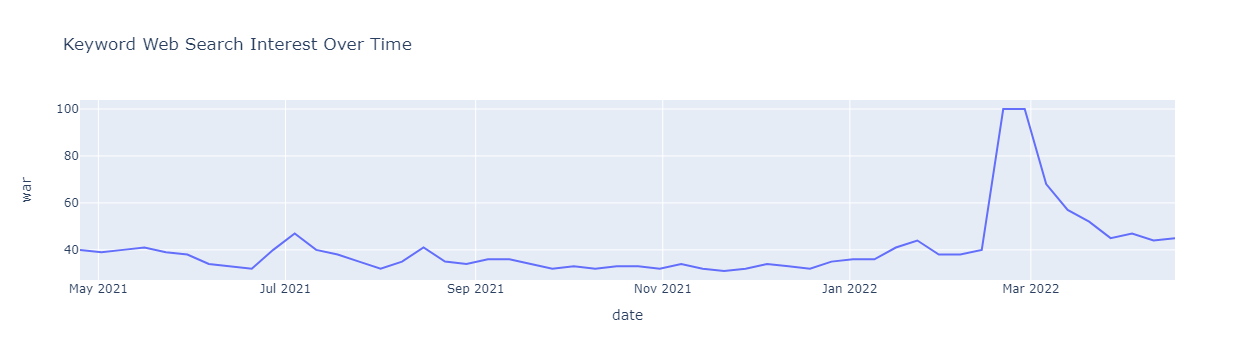

In [28]:
# Earlist date (5. sep 2019)
pytrends.build_payload(topic, cat=0, timeframe='today 12-m') 

data = pytrends.interest_over_time() 
data = data.reset_index() 


import plotly.express as px

fig = px.line(data, x="date", y=topic[1], title='Keyword Web Search Interest Over Time')
fig.show() 